In [17]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

# Model Selection

Reference : 
* https://www.coursera.org/learn/machine-learning/resources/LIZza
* https://en.wikipedia.org/wiki/Model_selection

Note: 
Lower-order polynomials and low model complexity are used inter-changeably. 

Similarly, higher-order polynomials and high model complexity are used inter-changeably.

## A Naive approach for Model Selection 

1. Find the parameters ($\theta$) using the **training (I)** set for each polynomial degree.
2. Find the polynomial degree $d$ with the least error using the **test (III)** set.
3. Estimate the generalization error also using the **test (III)** set with $J_{test}(\Theta^{(d)})$ (d = theta from polynomial with lower error).

In this case, we have trained one variable, d, or the degree of the polynomial, using the **test (III)** set. This will cause our error value to be greater for any other set of data.


TL;DR We use the **training (I)** set to find the values of parameters. We then choose $d$ (degree of model/polynomial) using 
**test (III)** set which results into minimum    **test (III)** error. 

##  Cross Validation: Recommended Approach for Model Selection

It is better that we don't use test (III) set to find degree of the model ($d$). Instead, it is better that we use another set known as **Cross-validation (II)** set to find degree of the model ($d$).

One example way to break down our dataset into the three sets is:


* **Training (I) set: 60%**
* **Cross validation (II) set : 20%**
* **Test (III) set: 20%**

We can now calculate three separate error values for the three different sets.


Method: 

1. Optimize the parameters in $\theta$ using the **training (I)** set for each polynomial degree.
2. Find the polynomial degree $d$ with the least error using the **cross validation (II)** set.
3. Estimate the generalization error using the **test (III)** set with $J_{test}(\Theta^{(d)})$ , (d = theta from polynomial with lower error).

Using a CV (II) set, we ensure that the degree of the polynomial $d$ has not been trained using the test (III) set.

# Diagnosing Bias vs Variance

### If prediction is poor (or generalization error is high) , how to find out whether our model has high variance 
### (overfitting) or high bias (underfitting) problem ?

Key is to look at magnitudes of $J_{test}$ and $J_{CV}$ and figure out if we have high variance (overfitting) or high bias (underfitting) problem in the model.

In this section we examine the relationship between the degree of the polynomial $d$ and the underfitting or overfitting of our hypothesis.

* We need to distinguish whether bias or variance is the problem contributing to bad predictions.
* High bias is underfitting and high variance is overfitting. We need to find a golden mean between these two.

The training error will tend to decrease as we increase the degree d of the polynomial since we complex model is able to fit training data better resulting into lower error.

At the same time, the cross validation error will tend to decrease as we increase d up to a point, and then it will increase as d is increased, forming a convex curve. It is because after a certain point a complex model which is able to fit training data might result into poor prediction for $CV$ data.

High bias (underfitting): both $J_{train}(\theta)$  and $J_{CV}(\theta)$) will be high. Also, $J_{train}(\theta)$ ≈ $J_{CV}(\theta)$).

High variance (overfitting): $J_{train}(\theta)$ will be low and $J_{CV}(\theta)$) >> $J_{train}(\theta)$.

The is represented in the figure below:

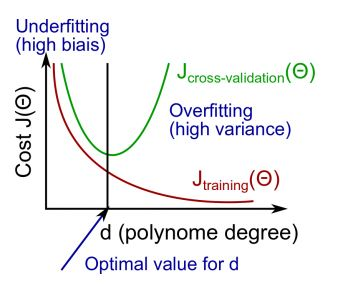

In [57]:
from IPython.display import Image
Image("D:\ML\A.JPG")

## In case we have overfitting in the model and we want to try using regularization term. What would be the best way to choose a value of $\lambda$ ?

1. We use Training data and $\lambda$ to find the parameters of the model.
2. The parameters are then used with CV dataset to find the $J_{CV}$.

We will repeat steps 1 and 2 with different values of $\lambda$ and choose a value which results into $ \mathrm{min} \ J_{CV}$. 


In [66]:
#my_str = "D:\General\Fall 2018_Spring 2019\Course Work\Machine Learning\Summary and code\3_Regularization and Diagnosis of problems\Regulazrization_optimal value.JPG"
#my_str_as_bytes = str.encode(my_str)
#print(my_str)
#print(my_str_as_bytes)

#cf = bytes(my_str, 'utf-8')

#print(cf)
#Image(cf)

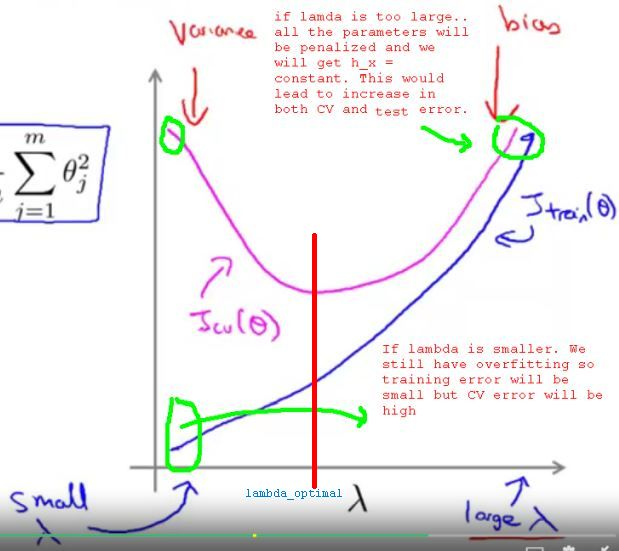

In [60]:
from IPython.display import Image
Image("D:\ML\B.JPG")

## Model selection : How to choose an appropriate model and $\lambda$  (regularization term) 

### Answer: Using Cross-validation


Steps :

0. Create bunch of models with different features or degrees on which to test different values of $\lambda$. 

1. Create list of $\lambda$ on which to iterate our pre-developed models. e.g. $\lambda \in (0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24)  $ 

2. Each pre-developed model is iterated over a list of $\lambda$ using training data to obtain set of $\theta$ parameters.

3. Use the $\theta$ obtained from training data for computing $ J_{CV} (\theta)$. 

4. Choose that combination of model and $\lambda$ which gives $ \mathrm{ min \ J_{CV} (\theta) } $

Pending: Is $\lambda$ always greater than zero ? ?

## Pending: k-fold Cross validation is used to tune hyper-parameter (confirm)

In k-fold cross validation we break the training dataset into k-subsets. In genreral in any iteration, we use k-1 subsets as training data and use the remaining 1 set as test set. 

Note that we do k-iterations and thus obtain k test errors. We finally take the average across all the k-iterations to report $J_{CV} $ for a particular set of hyper-parameters.

In **Hyper-parameter tuning** we choose those set of parameters for which k-fold cross validation result into minimum $J_{CV} $.

We finally use optimal parameter over test data which results into generalization error.

## Error Analysis

**What is error analysis??**

Manually examining mistakes that your algorithm is making can give you insights into what to do next. This process is called error analysis. 

Take for example, you built a cat classifier showing 10% test error and one of your colleagues pointed out that your algorithm was misclassifying dog images as cats. Should you try to make your cat classifier do better on dogs?

Ref: https://towardsdatascience.com/error-analysis-to-your-rescue-773b401380ef


# Learning Curves


Test set error always increases as  $m$ (training set size) increases. It is because we can easily fit the data with smaller number of points. But, this becomes increasing difficult when $m$ (training set size) increases.

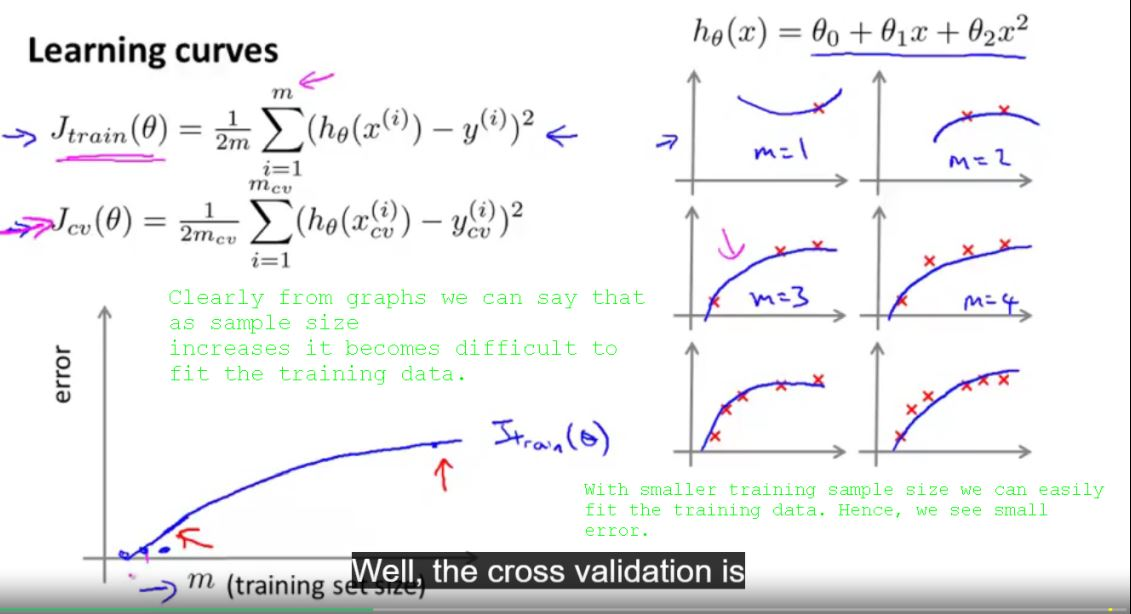

In [61]:
from IPython.display import Image
Image("D:\ML\C.JPG",width=600,height=600)

### **Learning curve: Detecting a model with High Bias** 

When the model complexity is low (case of High Bias) then with large $m$ both train and test error will be high and would converge to each other.


Low training set size: causes $ J_{train}{(\theta)} $  to be low and $ J_{CV}{(\theta)} $ to be high.

Large training set size: causes both $ J_{train}{(\theta)} $  and $ J_{CV}{(\theta)} $ to be high with $ J_{train}{(\theta)} $)≈ $ J_{CV}{(\theta)} $.

If a learning algorithm is suffering from high bias, getting more training data will not (by itself) help much.


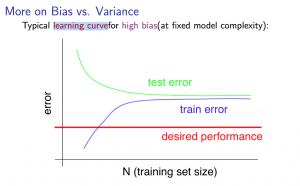

In [64]:
from IPython.display import Image
Image("D:\ML\D.png",width=400,height=400)

### **Learning curve: Detecting a model with High Variance** 

When the model complexity is large (case of High variance) then with large $m$ test error will be high and would NOT converge close to each other.

Low training set size: $ J_{train}{(\theta)} $ will be low and $ J_{CV}{(\theta)} $ will be high.

Large training set size: $ J_{train}{(\theta)} $ increases with training set size and $ J_{CV}{(\theta)} $ continues to decrease without leveling off. Also, $ J_{train}{(\theta)} $ < $ J_{CV}{(\theta)} $ but the difference between them remains significant.

If a learning algorithm is suffering from high variance, getting more training data is likely to help.


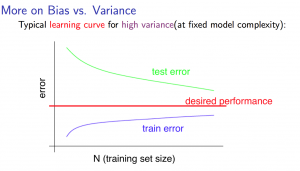

In [65]:
from IPython.display import Image
Image("D:\ML\E.png",width=400,height=400)

### Diagnosing Neural Networks

Using a single hidden layer is a good starting default. You can train your neural network on a number of hidden layers using your cross validation set.

# Bias Variance Tradeoff



* Complex model => sensitive to data => much affected by changes in X => high variance, low bias.
* Simple model => more rigid => does not change as much with changes in X => low variance, high bias.

One of the most important goals in learning: finding a model that is just right in the bias-variance trade-off. In reality, we would want to choose a model somewhere in between, that can generalize well but also fits the data reasonably well.

**Only way to solve such a problem is use Cross-validation**

### Bias-variacne tradeoff : Mathematical approach/understanding

Read the below link to see that our ultimate aim is to find a learning algorithm/model which leads to minimization of genrerlization error.

https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff


Finding an $\hat {f} (x) $ that generalizes to points outside of the training set can be done with any of the countless algorithms used for supervised learning. It turns out that whichever function $\hat {f}(x) $ we select, we can decompose its expected error on an unseen sample $ x $ as follows:



$ \mathrm { E \ [ ( y - \hat{f}(x) )^{2}] =  ( \  Bias \ [ \hat{f}(x) ] \ )^{2}  + V [ \hat{f}(x) ] + \sigma^{2} }   $


The three terms represent:

- the square of the bias of the learning method, which can be thought of as the error caused by the simplifying assumptions built into the method. E.g., when approximating a non-linear function $ f(x) $ using a learning method for linear models, there will be error in the estimates $\hat {f}(x) $ due to this assumption;
- the variance of the learning method, or, intuitively, how much the learning method $\hat {f}(x) $ will move around its mean;
- the irreducible error $\sigma ^{2}$ (this error can never be brought to $0$ by any of the learning algorithm

### Remember these thumb rules while running diagnostics 

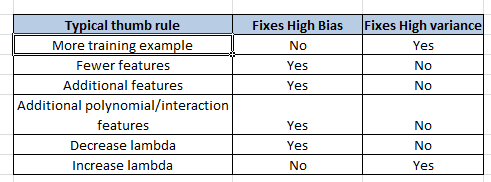

In [67]:
Image("D:\ML\F.png",width=400,height=400)

##  Error Metric for skewed classes

**Claim** :It is sometimes difficult to tell whether a reduction in error is actually an improvement of the algorithm.

For example: In predicting a cancer diagnoses where 0.5% of the examples have cancer, we find our learning algorithm has a 1% error. However, if we were to simply classify every single example as a 0, then our error would reduce to 0.5% even though we did not improve the algorithm.
This usually happens with skewed classes; that is, when our class is very rare in the entire data set.


Finding Precision and Recall are the 2 metrics which give us a better sense of how our classifier is doing. Ideally, we want both precision and recall to be high.


**Precision** : of all patients where we predicted where y=1, what fraction actually has cancer?

$\mathrm{Precision} = \dfrac{\text{True Positives}}{\text{Total number of predicted positives}}
= \dfrac{\text{True Positives}}{\text{True Positives}+\text{False positives}}$


**Recall**: Of all the patients that actually have cancer, what fraction did we correctly detect as having cancer?

$\mathrm{Recall} = \dfrac{\text{True Positives}}{\text{Total number of actual positives}}= \dfrac{\text{True Positives}}{\text{True Positives}+\text{False negatives}} $




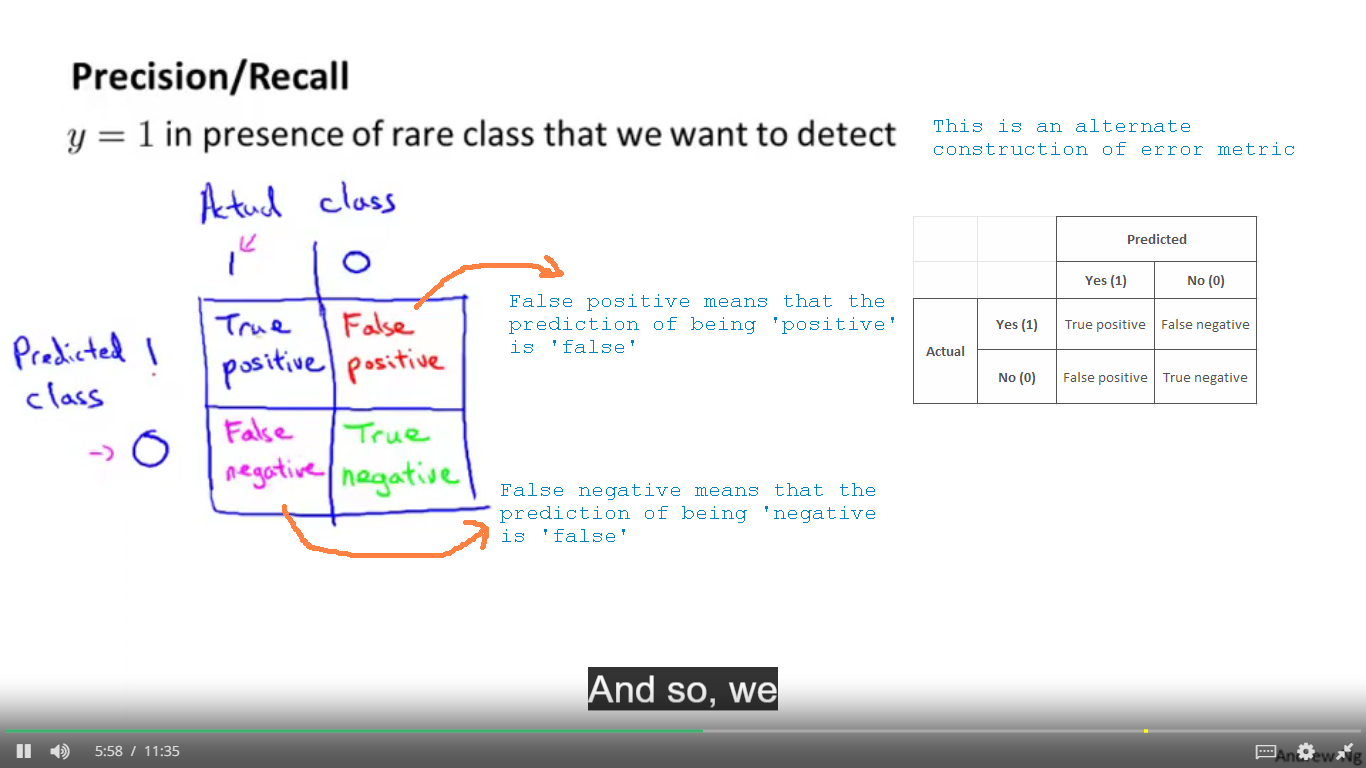

Note that there is always a tradeoff between precision and recall. 

The curve between precision and recall is constructed using an array of threshold values. For each value of threshold, we find precsion and recall, then plot it on the graph.

Hence, we come up with a single evaluation metric  (F-score) to compare 2 or different models.

F-score = $ 2  \frac{P*R}{P+R} $ 



In [72]:
#from pathlib import Path
#filename = Path("D:\General\Fall 2018_Spring 2019\Course Work\Machine Learning\Summary and code\03_Regularization and Diagnosis of problems\High bias_high variance.JPG")

#import os
#path_1 = "D:\General\Fall 2018_Spring 2019\Course Work\Machine Learning\Summary and code\03_Regularization and Diagnosis of problems\High bias_high variance.JPG"
#xd = os.path.normcase(path_1)
#Image(xd)

### sklearn confusion matrix

scikit learn represents confusion matrix in the following way. Precision and recall is calculated for each class seperately.



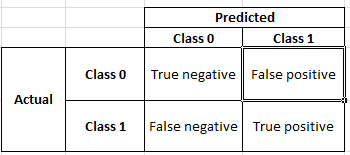

#### How to read classification report

For each class, F-score is computed using $ 2  \frac{P*R}{P+R} $ relation. By support we mean total number of actual values present in that class. Avg/total for precision, recall and F-score is coumputed using weighted average in numerator and then dividing by total sum in the denominator. 

For a class-x, precision = correct predictions in class-x / total predictions in class-x
<br>

                recall = correct predictions in class-x / actual(true) values in class-x


Reference:

- https://stackoverflow.com/questions/30746460/how-to-interpret-scikits-learn-confusion-matrix-and-classification-report

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Pending: Is false postive equal to type 1 error or type 2 ??

# ROC Curve

Source: 

* Google's course: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
* StatQuest : https://www.youtube.com/watch?v=4jRBRDbJemM
* Wiki: https://en.wikipedia.org/wiki/Receiver_operating_characteristic






ROC (reciever operating characteristics) is the graph plotted between TPR (true postive rate) and FPR(False postive rate).


TPR = sensitivity = recall = probability of detection = $\frac{TP}{TP + FN}$

FPR = 1- specificity = probability of false alarm =  $\frac{FP}{FP + TN}$

We compare different binary classification models using ROC curve. We plot FPR (x-axis) and  TPR (y-axis) for each threshold value.


**AUC (area under curve)** is the area under the curve of the ROC plot. AUC $\in [0.5,1] $. Higher AUC means better is the model in making the prediction. AUC provides an aggregate measure of performance across all possible classification thresholds.

**Inefficient way to compute AUC** : for each threshold value, find TPR and FPR to find the plot. Now, use integral calculus to find the area under the curve

**Efficient way to compute AUC** : Arrange each input ($x$) based on output $h_{\theta}(x)$ in ascending order.  One way of interpreting AUC is that AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

### Summary

ROC: Plotting ROC curve makes it easy in determining which threshold to choose while building a classifier.

AUC: AUC helps in determining which classification algorithm is better.

**F-Score vs ROC curve**

In case of class imbalance or rare disease kind of phenomenon it is better to choose the threshold using F-score instead of ROC curve. In ROC curve, while computing FPR we make use of True negative which can be very large for a rare disease and thus would create an imbalance.

Hence, it is better to replace FPR with precision which doesn't make use of True negatives and is unaffected by the imbalance. So, we end up combining TPR (recall) and precision to find F-score.

https://stats.stackexchange.com/questions/210700/how-to-choose-between-roc-auc-and-f1-score

### Questions:

1. Is the ranking done for a random value of threshold ? Answer: No

The probability is computed across all the threshold values. See the math:

https://stats.stackexchange.com/questions/180638/how-to-derive-the-probabilistic-interpretation-of-the-auc

2. Interpreation of AUC:

https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it


In [76]:
x=[2,3]
list( enumerate(x,2019) )bbb

[(2019, 2), (2020, 3)]

In [81]:
x= [2,4,6]


In [82]:
any(x)

True